# Python Project: Analysis of NFL Football Games

## Summary
#### This project will run exploratory data analysis on NFL football games using pandas, scikit-learn, matplotlib, and seaborn. Then three models will be created to predict which football team will win based on 49 predictors. The data is scraped from from Pro Football Reference (https://www.pro-football-reference.com/years/) and contains every game from the 2013 season till the 2021 season (9 seasons with 2286 games). Each columns represents the team's average for the season. For example, 'points' is the average amount of points a team get per game and 'oppPoints' is the oppossing team's points per game.

### Question
#### Which statistics of an NFL football game make the biggest difference in determining the winner?

### Hypothesis
#### Passing yards will be the most significant predictor in determing the winner of the football game

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import pickle

### Read in data and clean it for our models

In [2]:
data = pd.read_csv('nflData.csv')
data.head()

,season,team,date,time,roof,surface,attendance,temp(f),humidity (%),wind(mph),...,oppPassAtt,oppCmp%,oppPassYds,oppPassTDs,oppPassINTs,oppSacks,oppAllowedSacks,oppFumbleRec,oppPenalties,win
0,2021,DAL,2021-09-09,08:20:00,outdoors,grass,65566.0,82.0,85.0,9.0,...,43.26,67.12,314.89,2.42,0.68,2.68,1.58,0.89,5.53,False
1,2021,TAM,2021-09-09,08:20:00,outdoors,grass,65566.0,82.0,85.0,9.0,...,37.65,68.26,281.65,2.24,0.65,2.29,2.24,0.41,7.59,True
2,2021,ARI,2021-09-12,01:00:00,outdoors,grass,67216.0,82.0,55.0,8.0,...,29.38,67.28,207.50,1.38,1.06,3.00,2.38,0.38,5.75,True
3,2021,ATL,2021-09-12,01:00:00,outdoors,turf,68633.0,NaN,NaN,NaN,...,29.83,61.78,213.50,1.17,0.67,1.83,1.83,0.22,6.17,False
4,2021,BUF,2021-09-12,01:00:00,outdoors,turf,69787.0,73.0,79.0,17.0,...,38.27,63.62,234.47,1.47,0.60,3.07,2.53,0.53,6.13,False


In [3]:
data.shape

(4572, 62)

In [4]:
# Rename columns
modelData = data.rename(columns={'possessionTime(sec)':'possessionTime',
                                      'oppPossessionTime(sec)':'oppPossessionTime'})

### Remove columns not used for analysis

In [5]:
modelData = modelData.drop(columns=['season','date','time','roof','surface','attendance','temp(f)','humidity (%)',
                               'wind(mph)','team','opponent','predictedToWin'])

In [6]:
modelData.shape

(4572, 50)

In [7]:
modelData.describe()

,wins,losses,points,pointsGivenUp,possessionTime,firstDowns,3rdDownConv%,4thDownAtt,4thDownConv%,yards,...,oppRushTDs,oppPassAtt,oppCmp%,oppPassYds,oppPassTDs,oppPassINTs,oppSacks,oppAllowedSacks,oppFumbleRec,oppPenalties
count,4572.000000,4570.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,...,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.000000,4572.00000,4572.000000
mean,4.090551,3.790372,22.884554,22.884862,1804.926509,20.147165,39.019751,1.070376,50.002863,346.791343,...,0.838806,34.888795,63.466951,250.829033,1.573222,0.841853,2.347332,2.347108,0.55631,6.385328
std,3.332008,2.914300,4.341533,3.435122,87.439507,2.175445,4.758251,0.372570,15.597831,35.757124,...,0.306357,3.636498,3.913462,33.319455,0.467404,0.294633,0.493558,0.648491,0.19078,0.938845
min,0.000000,0.000000,13.710000,14.060000,1531.000000,14.430000,26.300000,0.240000,6.250000,241.560000,...,0.190000,25.710000,53.590000,180.250000,0.710000,0.220000,0.730000,0.820000,0.07000,3.860000
25%,1.000000,1.000000,19.710000,20.390000,1749.000000,18.620000,35.817500,0.810000,40.280000,320.000000,...,0.620000,32.252500,60.632500,225.870000,1.240000,0.620000,2.000000,1.880000,0.41000,5.800000
50%,3.000000,3.000000,22.600000,22.750000,1816.000000,20.110000,38.420000,1.000000,49.520000,347.250000,...,0.810000,35.000000,63.605000,249.560000,1.530000,0.820000,2.330000,2.310000,0.56000,6.440000
75%,6.000000,6.000000,25.880000,25.280000,1864.000000,21.680000,42.510000,1.250000,61.110000,372.950000,...,1.000000,37.530000,66.320000,274.940000,1.870000,1.000000,2.680000,2.860000,0.67000,7.060000
max,16.000000,15.000000,36.760000,30.600000,2061.000000,27.060000,51.850000,2.440000,94.440000,457.350000,...,1.870000,43.360000,72.580000,356.000000,3.350000,2.000000,3.600000,4.440000,1.20000,9.250000


<a id='here'></a>
### Remove least important variables based off coefficient calculations

In [8]:
#modelData = modelData.drop(columns=['turnovers','oppTurnovers','sacks','oppSacks'])

## Remove the pound signs and this line once you reach cell 27

### Check for null values

In [9]:
modelData.isnull().sum()

home                 0
wins                 0
losses               2
points               0
pointsGivenUp        0
possessionTime       0
firstDowns           0
3rdDownConv%         0
4thDownAtt           0
4thDownConv%         0
yards                0
yardsGivenUp         0
turnovers            0
rushAtt              0
rushYds              0
rushTDs              0
passAtt              0
cmp%                 0
passYds              0
passTDs              0
passINTs             0
sacks                0
allowedSacks         0
fumbleRec            0
penalties            0
oppWins              4
oppLosses            0
oppPoints            0
oppPointsGivenUp     0
oppPossessionTime    0
oppFirstDowns        0
opp3rdDownConv%      0
opp4thDownAtt        0
opp4thDownConv%      0
oppYards             0
oppYardsGivenUp      0
oppTurnovers         0
oppRushAtt           0
oppRushYds           0
oppRushTDs           0
oppPassAtt           0
oppCmp%              0
oppPassYds           0
oppPassTDs 

In [10]:
modelData.dropna(subset=['oppWins'],inplace=True)

In [11]:
modelData.isnull().sum()

home                 0
wins                 0
losses               0
points               0
pointsGivenUp        0
possessionTime       0
firstDowns           0
3rdDownConv%         0
4thDownAtt           0
4thDownConv%         0
yards                0
yardsGivenUp         0
turnovers            0
rushAtt              0
rushYds              0
rushTDs              0
passAtt              0
cmp%                 0
passYds              0
passTDs              0
passINTs             0
sacks                0
allowedSacks         0
fumbleRec            0
penalties            0
oppWins              0
oppLosses            0
oppPoints            0
oppPointsGivenUp     0
oppPossessionTime    0
oppFirstDowns        0
opp3rdDownConv%      0
opp4thDownAtt        0
opp4thDownConv%      0
oppYards             0
oppYardsGivenUp      0
oppTurnovers         0
oppRushAtt           0
oppRushYds           0
oppRushTDs           0
oppPassAtt           0
oppCmp%              0
oppPassYds           0
oppPassTDs 

### Encode boolean values and split up predictors (X) and target (y)

In [12]:
modelData['home'] = modelData['home'].astype(int)
X = modelData.drop(columns=['win'])
y = modelData['win']
X.head()

,home,wins,losses,points,pointsGivenUp,possessionTime,firstDowns,3rdDownConv%,4thDownAtt,4thDownConv%,...,oppRushTDs,oppPassAtt,oppCmp%,oppPassYds,oppPassTDs,oppPassINTs,oppSacks,oppAllowedSacks,oppFumbleRec,oppPenalties
0,0,0,0.0,30.12,20.71,1794,22.24,43.75,1.29,59.09,...,1.16,43.26,67.12,314.89,2.42,0.68,2.68,1.58,0.89,5.53
1,1,0,0.0,29.95,20.95,1822,23.53,44.56,1.11,50.00,...,0.94,37.65,68.26,281.65,2.24,0.65,2.29,2.24,0.41,7.59
2,0,0,0.0,25.56,22.22,1852,21.17,41.44,1.72,67.78,...,1.25,29.38,67.28,207.50,1.38,1.06,3.00,2.38,0.38,5.75
3,1,0,0.0,18.41,27.00,1690,18.00,36.52,1.41,47.92,...,1.44,29.83,61.78,213.50,1.17,0.67,1.83,1.83,0.22,6.17
4,1,0,0.0,29.44,17.00,1901,23.72,48.98,1.22,44.64,...,0.60,38.27,63.62,234.47,1.47,0.60,3.07,2.53,0.53,6.13


In [13]:
modelData.dtypes

home                   int64
wins                   int64
losses               float64
points               float64
pointsGivenUp        float64
possessionTime         int64
firstDowns           float64
3rdDownConv%         float64
4thDownAtt           float64
4thDownConv%         float64
yards                float64
yardsGivenUp         float64
turnovers            float64
rushAtt              float64
rushYds              float64
rushTDs              float64
passAtt              float64
cmp%                 float64
passYds              float64
passTDs              float64
passINTs             float64
sacks                float64
allowedSacks         float64
fumbleRec            float64
penalties            float64
oppWins              float64
oppLosses              int64
oppPoints            float64
oppPointsGivenUp     float64
oppPossessionTime      int64
oppFirstDowns        float64
opp3rdDownConv%      float64
opp4thDownAtt        float64
opp4thDownConv%      float64
oppYards      

## Exploratory Data Analysis

### Show correlations of all variables to the target (win)

In [13]:
correlations = []
columns = modelData.columns
for column in modelData.columns:
    correlations.append(modelData[column].corr(modelData['win']))

In [14]:
corrs_dict = {}
for column,correlation in zip(columns,correlations):
    corrs_dict[column] = correlation

In [15]:
{k: v for k, v in sorted(corrs_dict.items(), key=lambda item: item[1])}
#Source: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

{'oppPoints': -0.2948845896585168,
 'pointsGivenUp': -0.2627885533322163,
 'oppYards': -0.20902977719546753,
 'oppPassTDs': -0.20839333163008292,
 'turnovers': -0.20837240091776174,
 'opp3rdDownConv%': -0.20643697079270776,
 'oppFirstDowns': -0.2007062514343387,
 'allowedSacks': -0.1946746005260562,
 'passINTs': -0.19334685935016133,
 'oppPossessionTime': -0.19169780498732958,
 'oppRushTDs': -0.17478990650893142,
 'oppRushAtt': -0.17142649648791172,
 'oppCmp%': -0.1688609875607864,
 'yardsGivenUp': -0.14326699642264715,
 '4thDownAtt': -0.14209026104525074,
 'oppSacks': -0.1419015641065073,
 'oppRushYds': -0.13714690018927417,
 'opp4thDownConv%': -0.12425900589215337,
 'losses': -0.11857716349466423,
 'oppPassYds': -0.11272231567824517,
 'oppFumbleRec': -0.10344760527265708,
 'oppWins': -0.10342997986236997,
 'penalties': -0.04758752698418717,
 'passAtt': -0.03174911838624719,
 'oppPassAtt': 0.03109503183789436,
 'oppPenalties': 0.04714460412546377,
 'fumbleRec': 0.10297169347316365,
 '

### Plot Correlations

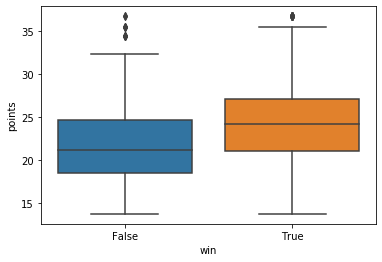

In [16]:
sns.boxplot(x=modelData['win'],y=modelData['points'])

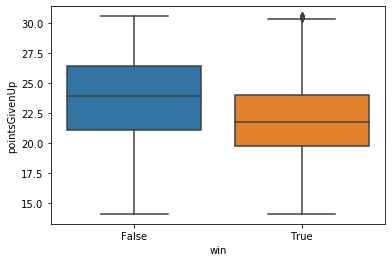

In [17]:
sns.boxplot(x=modelData['win'],y=modelData['pointsGivenUp'])

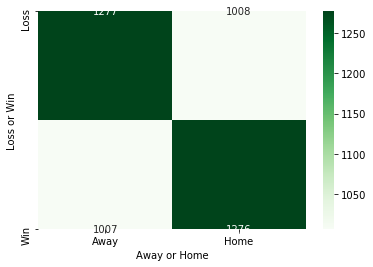

In [18]:
cm = confusion_matrix(modelData['win'],modelData['home'])
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',cmap='Greens',ax=ax)
ax.set_xlabel('Away or Home'); ax.set_ylabel('Loss or Win')
ax.xaxis.set_ticklabels(['Away','Home']); ax.yaxis.set_ticklabels(['Loss','Win']);

### Check distributions

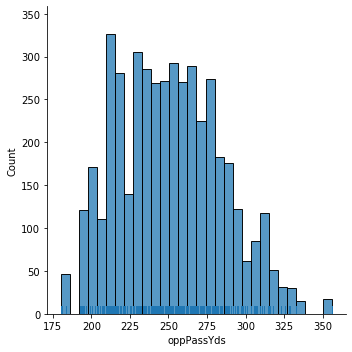

In [19]:
sns.displot(modelData.oppPassYds,rug=True)

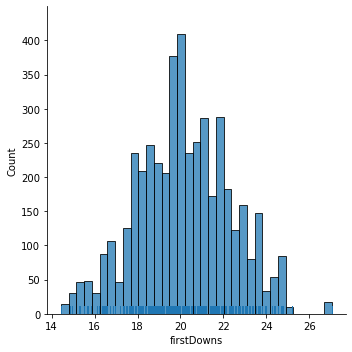

In [20]:
sns.displot(modelData.firstDowns,rug=True)

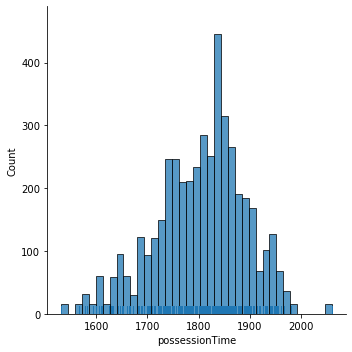

In [21]:
sns.displot(modelData.possessionTime,rug=True)

## Findings before machine learning analysis
#### - Data is normally distributed 
#### - The amount of points a team averages appears to have the biggest influence on who wins
#### - Wins and opponent wins don't have a large correlation to the target variable (surprising to me)

## Prepare data for machine learning models

### Standardise data

In [22]:
# Standardise the data
for column in X:
    X[column] = scale(X[column])

In [23]:
X.head()

,home,wins,losses,points,pointsGivenUp,possessionTime,firstDowns,3rdDownConv%,4thDownAtt,4thDownConv%,...,oppRushTDs,oppPassAtt,oppCmp%,oppPassYds,oppPassTDs,oppPassINTs,oppSacks,oppAllowedSacks,oppFumbleRec,oppPenalties
0,-1.0,-1.229137,-1.30115,1.665823,-0.632309,-0.125469,0.961645,0.993587,0.590884,0.583349,...,1.048422,2.301613,0.933044,1.921937,1.811019,-0.549094,0.674247,-1.182517,1.748873,-0.910929
1,1.0,-1.229137,-1.30115,1.626675,-0.562430,0.194792,1.554446,1.163798,0.107347,0.000325,...,0.330319,0.759338,1.224410,0.924540,1.425967,-0.650918,-0.116656,-0.164136,-0.766707,1.283431
2,-1.0,-1.229137,-1.30115,0.615726,-0.192649,0.537930,0.469942,0.508173,1.746002,1.140717,...,1.342191,-1.514212,0.973938,-1.300398,-0.413726,0.740675,1.323194,0.051884,-0.923930,-0.676580
3,1.0,-1.229137,-1.30115,-1.030809,1.199124,-1.315011,-0.986785,-0.525697,0.913243,-0.133084,...,1.962371,-1.390500,-0.431777,-1.120363,-0.862953,-0.583035,-1.049517,-0.796767,-1.762457,-0.229186
4,1.0,-1.229137,-1.30115,1.509230,-1.712535,1.098387,1.641758,2.092599,0.402842,-0.343460,...,-0.779476,0.929785,0.038498,-0.491139,-0.221200,-0.820624,1.465151,0.283334,-0.137812,-0.271795


### Clean standardized dataset in Alteryx for GUI (Special add on to the project, see other notebook)

In [24]:
standardizedData = X.to_csv(r'standardizedData.csv')

### Split data into training and testing sets

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Create and train models

In [26]:
lm = LogisticRegression(solver='lbfgs',max_iter=3750,random_state = 42).fit(X_train,y_train)
svc = SVC(random_state = 42).fit(X_train,y_train)
rf = RandomForestClassifier(random_state = 42).fit(X_train,y_train)

### Test results 
#### Logistic regression was the most accurate model

In [27]:
# Test the models
lm_pred = lm.predict(X_test)
svc_pred = svc.predict(X_test)
rf_pred = rf.predict(X_test)

In [28]:
# Create Confusion Matrix
lmCF = confusion_matrix(y_test,lm_pred)
svcCF = confusion_matrix(y_test,svc_pred)
rfCF = confusion_matrix(y_test,rf_pred)

In [29]:
# Calculate accuracy of the model's predictions
lm_accuracy = round((accuracy_score(y_test,lm_pred)) * 100,2)
svc_accuracy = round((accuracy_score(y_test,svc_pred)) * 100,2)
rf_accuracy = round((accuracy_score(y_test,rf_pred)) * 100,2)

In [30]:
# Logistic Regression Results
print(f'Logistic Regression Results: {lm_accuracy}%')
print(lmCF)

Logistic Regression Results: 68.13%
[[386 169]
 [195 392]]


In [31]:
# Support Vector Machine Results
print(f'Support Vector Machine Results: {svc_accuracy}%')
print(svcCF)

Support Vector Machine Results: 66.9%
[[378 177]
 [201 386]]


In [32]:
# Random Forest Results
print(f'Random Forest Results: {rf_accuracy}%')
print(rfCF)

Random Forest Results: 64.97%
[[371 184]
 [216 371]]


## Analyze the model's results

### Plot Logistic Regression Model's ROC Curve

In [33]:
# Define metrics
lmpred_proba = lm.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,lmpred_proba)
auc = metrics.roc_auc_score(y_test,lmpred_proba)

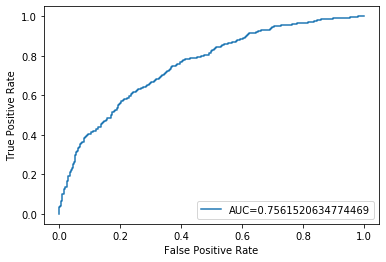

In [34]:
# Plot ROC curve
plt.plot(fpr,tpr,label='AUC='+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Determine most impactful predictors and their coefficients

In [35]:
# Create the list of coefficients
coefficients = {}
coefs = lm.coef_[0]
cols = X.columns

In [36]:
for col,coef in zip(cols,coefs):
    coefficients[col] = coef

In [37]:
# Plot the coefficients sorted from most impactful to least impactful
keys = sorted(coefficients, key=lambda k: abs(coefficients[k]), reverse=True)
values = []
for coef in coefs:
    values.append(coef)
values = sorted(values, key=abs, reverse = True)

### Graph coefficients

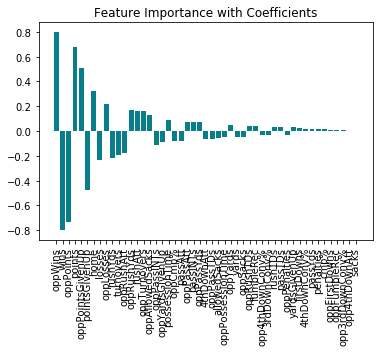

In [38]:
plt.bar(x=keys,height=values,color='#087E8B')
plt.title('Feature Importance with Coefficients')
plt.xticks(rotation='vertical')
plt.show()

### Go back up and remove least impactful variables
<a id='Remove least important variables based off coefficient calculations'></a>[Click Here](#here)

## Save model for GUI predictions

In [39]:
lmModel = pickle.dump(lm,open('lmModel.sav','wb'))
svcModel = pickle.dump(svc,open('svcModel.sav','wb'))
rfModel = pickle.dump(rf,open('rfModel.sav','wb'))

## Overall Findings
#### - Logistic Regression findings
####      - Wins and opponent wins are the most important in determining which team wins or not
####      - Model does pretty well in predicting the outcome of an NFL football game (68%)
####      - Correlations don't seem to be the best insight into discovering the most influential predictors